In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

## Reading the Dataset

In [2]:
data = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\MS DATA SCIENCE\Lead+Scoring+Case+Study\Lead Scoring Assignment\leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
data.shape

(9240, 37)

In [4]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#finding out how many null values are in the dataset
data.isna().mean().sort_values(ascending=False) * 100

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [7]:
#dropping columns with more than 40% of values missing.
missing_vals = data.isna().mean() * 100
CTR = missing_vals[missing_vals>40].index

In [8]:
data = data.drop(CTR, axis=1)

In [9]:
#checking for missing values again
data.isna().mean().sort_values(ascending=False) * 100

Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Update me on Supply Chain Content                 0.000000
Prospect ID                                       0.000000
Digital Advertisement                             0.000000
Get updates on DM Content                         0.0000

In [10]:
# Identify and handle the 'Select' values in categorical variables
select_values = ['Select Specialization', 'Select', 'Select City', 'Select Profile']
data = data.replace(select_values, 'Not Specified')

In [11]:
#let's look at the tags column
data.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [12]:
data.Tags.mode()

0    Will revert after reading the email
Name: Tags, dtype: object

In [13]:
#due to multiple categories in this column, we'll be creating new category "unknown" as we can't simply use the mode here.
data['Tags'] = data['Tags'].fillna('Not Specified')


In [14]:
data.Tags.value_counts()

Not Specified                                        3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [15]:
#checking for missing values again
data.isna().mean().sort_values(ascending=False) * 100

Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Tags                                              0.000000
Update me on Supply Chain Content                 0.000000
Prospect ID                                       0.000000
Digital Advertisement                             0.000000
Get updates on DM Content                         0.0000

In [16]:
#let's look at the "Lead Profile" column
data["Lead Profile"].value_counts()

Not Specified                  4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [17]:
data["Lead Profile"].isna().sum()

2709

In [18]:
#as the "select" values in this column are due to not selecting any option, we can classify them as unknown as well.
data["Lead Profile"] = data["Lead Profile"].fillna("Not Specified")

In [19]:
#let's look at the "Lead Profile" column again
data["Lead Profile"].value_counts()

Not Specified                  6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [20]:
data = data.replace(to_replace="Select",value="Unknown")

In [21]:
#let's look at the "Lead Profile" column again
data["Lead Profile"].value_counts()

Not Specified                  6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [22]:
#checking for missing values again
data.isna().mean().sort_values(ascending=False) * 100

What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Tags                                              0.000000
Update me on Supply Chain Content                 0.000000
Prospect ID                                       0.000000
Digital Advertisement                             0.000000
Get updates on DM Content                         0.000000
Lead Profile                                      0.0000

In [23]:
#let's look at the "Lead Profile" column
data["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [24]:
data["What matters most to you in choosing a course"].isna().sum()

2709

In [25]:
#as the data in this column is already very heavily biased towards one category,we'll just fill the missing values with the mode.

mode_value = data['What matters most to you in choosing a course'].mode()[0]
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].fillna(mode_value)


In [26]:
#checking for missing values again
data.isna().mean().sort_values(ascending=False) * 100

What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Tags                                              0.000000
Update me on Supply Chain Content                 0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Get updates on DM Content                         0.000000
Lead Profile                                      0.0000

In [27]:
#let's look at the "What is your current occupation" column
data["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [28]:
data["What is your current occupation"].isna().sum()

2690

In [29]:
#as the data in this column is already very heavily biased towards one category,we'll just fill the missing values with the mode.
mode_value = data['What is your current occupation'].mode()[0]
data['What is your current occupation'] = data['What is your current occupation'].fillna(mode_value)


In [30]:
#checking for missing values again
data.isna().mean().sort_values(ascending=False) * 100

Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Tags                                              0.000000
Update me on Supply Chain Content                 0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Get updates on DM Content                         0.000000
Lead Profile                                      0.000000
I agree to pay the amount through cheque          0.0000

In [31]:
#let's look at the "country" column
data["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [32]:
data["Country"].isna().sum()

2461

In [33]:
data["Country"] = data["Country"].fillna("Not Specified")

In [34]:
#checking for missing values again
data.isna().mean().sort_values(ascending=False) * 100

How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Digital Advertisement                             0.000000
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Tags                                              0.000000
Prospect ID                                       0.000000
Update me on Supply Chain Content                 0.000000
X Education Forums                                0.000000
Get updates on DM Content                         0.000000
Lead Profile                                      0.000000
I agree to pay the amount through cheque          0.0000

In [35]:
# let's look at "How did you hear about X Education" column
data['How did you hear about X Education'].value_counts()

Not Specified            5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [36]:
data['How did you hear about X Education'].isna().sum()

2207

In [37]:
#as the data in this column is already very heavily biased towards one category,
#we'll just fill the missing values with the mode.

mode_value = data['How did you hear about X Education'].mode()[0]
data['How did you hear about X Education'] = data['How did you hear about X Education'].fillna(mode_value)


In [38]:
#checking for missing values again
data.isna().mean().sort_values(ascending=False) * 100

Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Update me on Supply Chain Content                 0.000000
Digital Advertisement                             0.000000
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Tags                                              0.000000
Prospect ID                                       0.000000
X Education Forums                                0.000000
Get updates on DM Content                         0.000000
Lead Profile                                      0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.0000

In [39]:
#let's look at the columns Specialisation and City.
print(data.Specialization.value_counts())
print(data.Specialization.isna().sum())

Not Specified                        1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64
1438


In [40]:
print(data.City.value_counts())
print(data.City.isna().sum())

Mumbai                         3222
Not Specified                  2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64
1420


In [41]:
#since both of these columns have values which simply can't be replaced by the mode.
#we'll fill "Not specified" in these columns.
data["City"] = data["City"].fillna("Not Specified")
data["Specialization"] = data["Specialization"].fillna("Not Specified")

In [42]:
#checking for missing values again
data.isna().mean().sort_values(ascending=False) * 100

Page Views Per Visit                             1.482684
TotalVisits                                      1.482684
Last Activity                                    1.114719
Lead Source                                      0.389610
Newspaper                                        0.000000
Digital Advertisement                            0.000000
Through Recommendations                          0.000000
Receive More Updates About Our Courses           0.000000
Tags                                             0.000000
Update me on Supply Chain Content                0.000000
Prospect ID                                      0.000000
Newspaper Article                                0.000000
Get updates on DM Content                        0.000000
Lead Profile                                     0.000000
City                                             0.000000
I agree to pay the amount through cheque         0.000000
A free copy of Mastering The Interview           0.000000
X Education Fo

In [43]:
#as the percentage of missing values is very low, we'll just remove them.
data = data.dropna()

In [44]:
#checking for missing values again
data.isna().mean().sort_values(ascending=False) * 100

Prospect ID                                      0.0
Lead Number                                      0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
City                                             0.0
Lead Profile                                     0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Tags                                             0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Magazine                                         0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
What is your current occupation               

In [45]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Not Specified,Not Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Not Specified,Not Specified,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Not Specified,Not Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Not Specified,Not Specified,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Not Specified,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Not Specified,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Not Specified,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Not Specified,Mumbai,No,No,Modified


#### after reviewing the data. we can safely drop the columns:
#### 1. Prospect ID 	
#### 2. Lead Number
#### 


## Data Analysis(EDA)

In [46]:
data = data.drop('Prospect ID', axis=1)
data = data.drop('Lead Number', axis=1)

In [47]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Not Specified,Not Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Not Specified,Not Specified,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Not Specified,Not Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Not Specified,Not Specified,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Not Specified,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Not Specified,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Not Specified,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Not Specified,Mumbai,No,No,Modified


In [48]:
#converting the columns with yes-no values into binary values.

# Define the columns to convert
columns_to_convert = ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article',
                      'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
                      'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                      'Get updates on DM Content', 'I agree to pay the amount through cheque',
                      'A free copy of Mastering The Interview']

# Convert columns with yes-no values into binary values (0 or 1)
data[columns_to_convert] = data[columns_to_convert].apply(lambda x: x.map({'Yes': 1, 'No': 0}))


In [49]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Not Specified,Not Specified,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,0,0,Not Specified,Not Specified,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Not Specified,Not Specified,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,Not Specified,Not Specified,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Not Specified,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Potential Lead,Mumbai,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,Not Specified,Mumbai,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Not Specified,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Not Specified,Mumbai,0,0,Modified


In [50]:
#the "Page Views Per Visit" column has values in float.
#which is wrong.we'll convert it into integer.

data['Page Views Per Visit'] = data['Page Views Per Visit'].astype(int)
data['TotalVisits'] = data['TotalVisits'].astype(int)


In [51]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0,0,0,Page Visited on Website,Not Specified,Not Specified,Not Specified,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,0,0,Not Specified,Not Specified,0,0,Modified
1,API,Organic Search,0,0,0,5,674,2,Email Opened,India,Not Specified,Not Specified,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,Not Specified,Not Specified,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2,1532,2,Email Opened,India,Business Administration,Not Specified,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Potential Lead,Mumbai,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1,305,1,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,Not Specified,Mumbai,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2,1428,1,Converted to Lead,India,Not Specified,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Not Specified,Mumbai,0,0,Modified


In [52]:
# Selecting the categorical columns (excluding 'Lead Quality')
categorical_columns = ['Lead Origin', 'Lead Source', 'Specialization', 'Last Activity', 'Country',
                       'How did you hear about X Education', 'What is your current occupation',
                       'What matters most to you in choosing a course', 'Tags', 'Lead Profile', 'City',
                       'Last Notable Activity']

# Converting categorical variables into dummy variables
data = pd.get_dummies(data, columns=categorical_columns)


In [53]:
# Display the updated DataFrame
data.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Not Specified,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Not Specified,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or 

In [54]:
# Let's check the dimensions of the dataframe
data.shape

(9074, 193)

In [55]:
# let's look at the statistical aspects of the dataframe
data.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Not Specified,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Not Specified,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or 

In [56]:
# Checking for outliers in the continuous variables
num = data[['Total Time Spent on Website','Page Views Per Visit']]
num.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000
mean,482.887481,2.300749
std,545.256560,2.165536
min,0.000000,0.000000
25%,11.000000,1.000000
50%,246.000000,2.000000
75%,922.750000,3.000000
90%,1373.000000,5.000000
95%,1557.000000,6.000000
99%,1839.000000,9.000000


In [57]:
#let's look at the page views per visit column.as it might have outliers.

data['Page Views Per Visit'].value_counts()

2     2234
0     2161
3     1360
1     1212
4      956
5      547
6      260
7      135
8       89
9       45
10      25
11      19
14      10
13       6
12       6
15       4
16       3
55       1
24       1
Name: Page Views Per Visit, dtype: int64

In [58]:
# as we can see there is one instance where we have the value 55.this value is the outlier.
#we will delete this value.

data = data[data['Page Views Per Visit'] != 55]


In [59]:
#rechecking the column.
data['Page Views Per Visit'].value_counts()


2     2234
0     2161
3     1360
1     1212
4      956
5      547
6      260
7      135
8       89
9       45
10      25
11      19
14      10
13       6
12       6
15       4
16       3
24       1
Name: Page Views Per Visit, dtype: int64

In [60]:
# Rechecking for outliers in the continuous variables
num = data[['Total Time Spent on Website','Page Views Per Visit']]
num.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Total Time Spent on Website,Page Views Per Visit
count,9073.000000,9073.000000
mean,482.907969,2.294941
std,545.283118,2.093776
min,0.000000,0.000000
25%,11.000000,1.000000
50%,246.000000,2.000000
75%,923.000000,3.000000
90%,1373.000000,5.000000
95%,1557.000000,6.000000
99%,1839.000000,9.000000


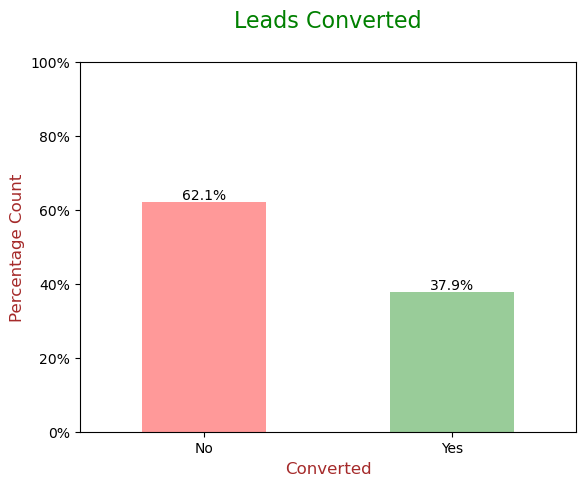

In [61]:
## ploting the results on bar plot

ax=(100*data["Converted"].value_counts(normalize=True)).plot.bar(color=["Red","Green"],alpha=0.4)

# Adding and formatting title
plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Green'})


# Labeling Axes
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

# modification ticks y axis
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks] 
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
plt.show()


### Bivariate Analysis for Numerical Variables

<Figure size 1600x400 with 0 Axes>

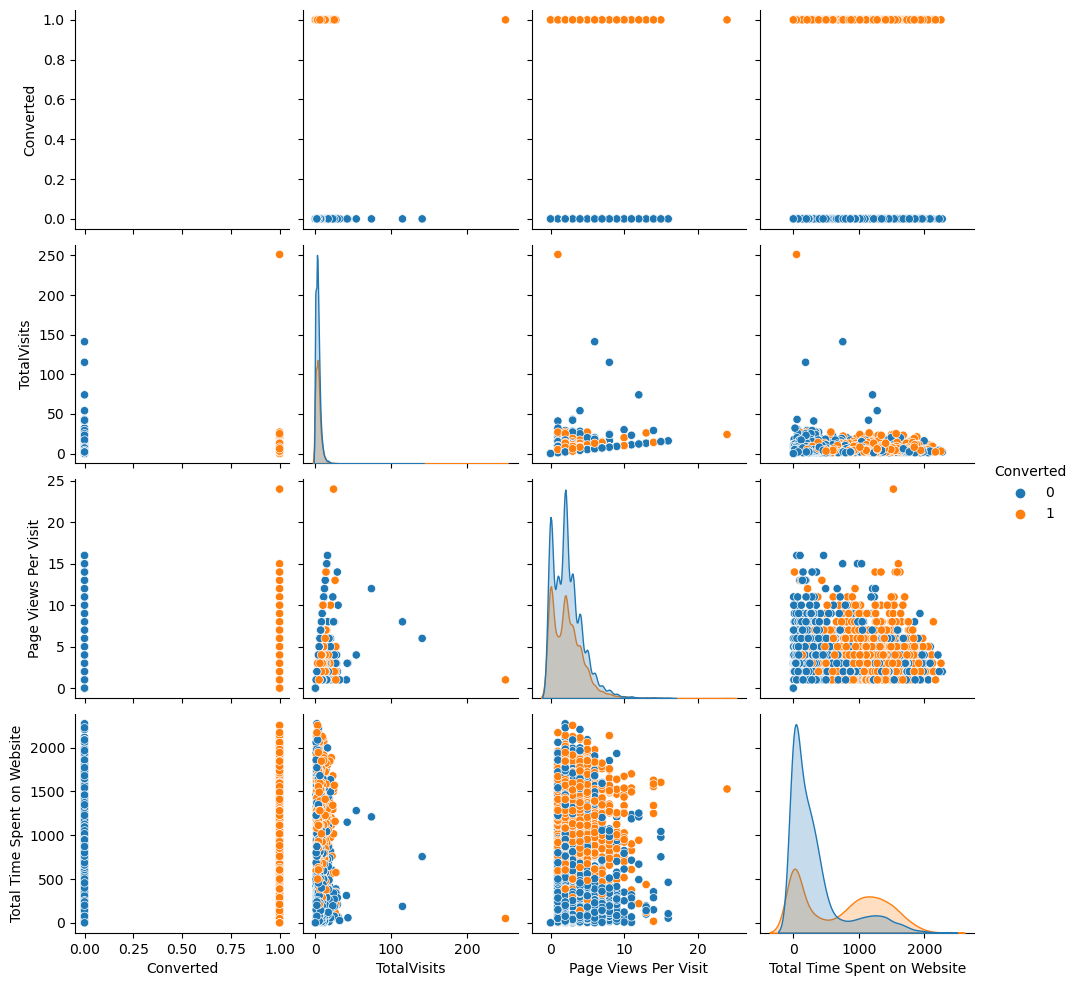

In [90]:
plt.figure(figsize=(16, 4))
sns.pairplot(data=data,vars=num_cols,hue="Converted")                                  
plt.show()

### Correlation between numerical variables

In [87]:
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

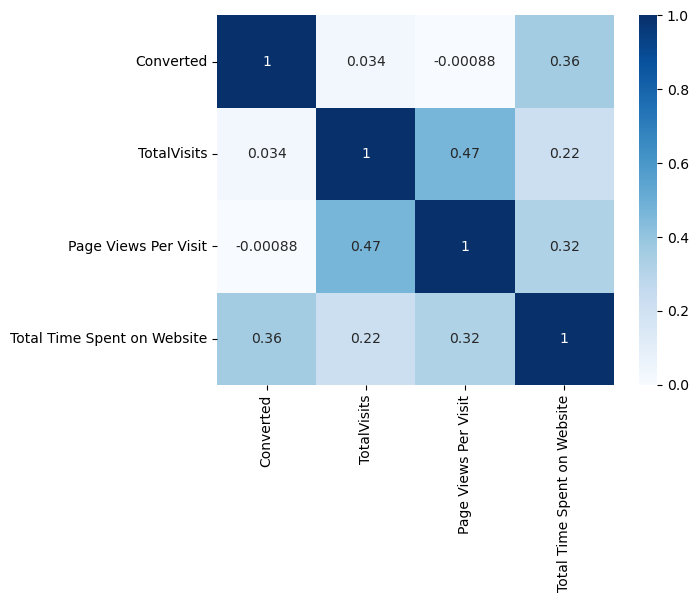

In [89]:
# Heatmap to show correlation between numerical variables
sns.heatmap(data=data[num_cols].corr(),cmap="Blues",annot=True)
plt.show()

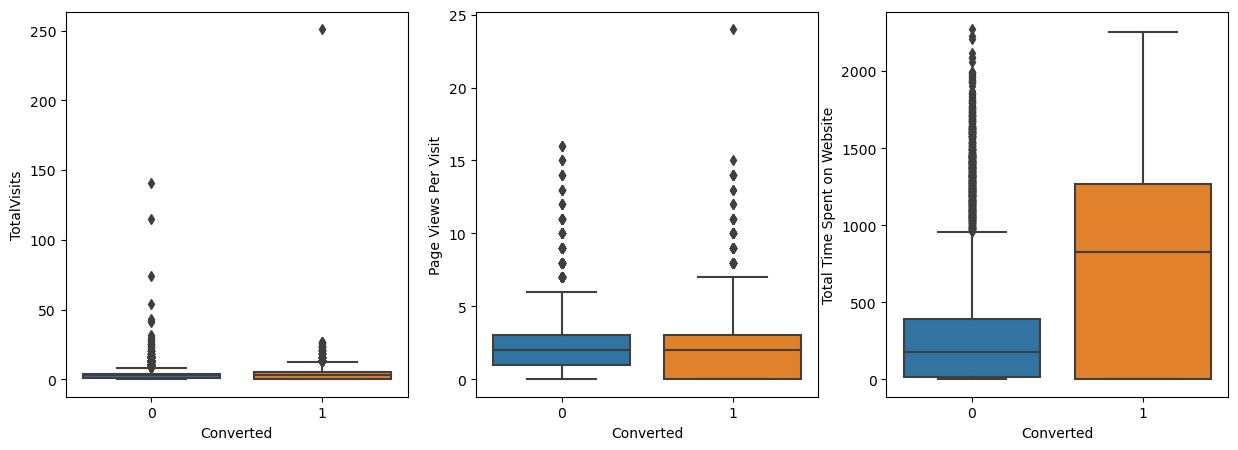

In [91]:
# Boxplot with Converted as hue

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = data)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = data)
plt.show()

### Test-Train Split

In [122]:
# Defining the feature matrix (X) and the target variable (y)
X = data.drop('Converted', axis=1)
y = data['Converted']

In [123]:
from sklearn.preprocessing import MinMaxScaler

# Select the continuous variables to scale
continuous_vars = ['Total Time Spent on Website', 'Page Views Per Visit']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected variables
data[continuous_vars] = scaler.fit_transform(data[continuous_vars])


In [124]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


In [125]:
#making our first model

import statsmodels.api as sm
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6185
Model Family:                Binomial   Df Model:                          165
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 18 Jul 2023   Deviance:                       43104.
Time:                        17:16:08   Pearson chi2:                 2.11e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

In [126]:
# as it is difficult to infer anything from the first model, we will use the RFE approach.
#we will start by arbitrarily selecting the first 40 columns.

# Initialize the logistic regression model
logistic_model = LogisticRegression()

# Initialize the RFE model
num_features_to_select = 40  # You can adjust this number as per your requirement
rfe = RFE(logistic_model, n_features_to_select=num_features_to_select)

# Fit the RFE model on the training data
rfe.fit(X_train, y_train)

# Get the selected features and their rankings
selected_features = rfe.support_
feature_rankings = rfe.ranking_

# Create a DataFrame to display the results
feature_selection_result = pd.DataFrame({
    'Feature': X.columns,
    'Selected': selected_features,
    'Ranking': feature_rankings
})


In [127]:
feature_selection_result.sort_values(by='Ranking', ascending=True, inplace=True)
feature_selection_result.head(40)

,Feature,Selected,Ranking
0,Do Not Email,True,1
69,Last Activity_Had a Phone Conversation,True,1
70,Last Activity_Olark Chat Conversation,True,1
73,Last Activity_SMS Sent,True,1
178,Last Notable Activity_Email Link Clicked,True,1
161,Tags_switched off,True,1
89,Country_Hong Kong,True,1
92,Country_Italy,True,1
190,Last Notable Activity_Unsubscribed,True,1
99,Country_Not Specified,True,1


In [128]:
# Selecting the top features based on RFE
selected_features = feature_selection_result[feature_selection_result['Selected'] == True]['Feature']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


In [129]:
# as there are lot of high p-value variables in the model, we will tweak the RFE approach.
#we will change the RFE threshold selecting the first 25 columns.

# Initialize the logistic regression model
model = LogisticRegression()

# Initialize the RFE model
num_features_to_select = 25  # You can adjust this number as per your requirement
rfe = RFE(model, n_features_to_select=num_features_to_select)

# Fit the RFE model on the training data
rfe.fit(X_train, y_train)

# Get the selected features and their rankings
selected_features = rfe.support_
feature_rankings = rfe.ranking_

# Create a DataFrame to display the results
feature_selection_result = pd.DataFrame({
    'Feature': X.columns,
    'Selected': selected_features,
    'Ranking': feature_rankings
})


# Selecting the top features based on RFE
selected_features = feature_selection_result[feature_selection_result['Selected'] == True]['Feature']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]



In [130]:
#making our second model

logm2 = sm.GLM(y_train,(sm.add_constant(X_train_selected)), family = sm.families.Binomial())
print(logm2.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1196.7
Date:                Tue, 18 Jul 2023   Deviance:                       2393.4
Time:                        17:16:47   Pearson chi2:                 8.03e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6139
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [131]:
# dropping the column with high p-value.

X_train_selected = X_train_selected.drop('Tags_Lateral student',axis =1)

In [132]:
#making our third model

logm3 = sm.GLM(y_train,(sm.add_constant(X_train_selected)), family = sm.families.Binomial())
print(logm3.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6326
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1200.0
Date:                Tue, 18 Jul 2023   Deviance:                       2399.9
Time:                        17:16:47   Pearson chi2:                 8.04e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6135
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [133]:
# dropping all the columns with high p-values.

X_train_selected = X_train_selected.drop('Tags_number not provided',axis =1)
X_train_selected = X_train_selected.drop('Tags_wrong number given',axis =1)
X_train_selected = X_train_selected.drop('Lead Profile_Lateral Student',axis =1)
X_train_selected = X_train_selected.drop('Lead Profile_Student of SomeSchool',axis =1)

In [134]:
#making our fourth model

logm4 = sm.GLM(y_train,(sm.add_constant(X_train_selected)), family = sm.families.Binomial())
print(logm4.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1226.5
Date:                Tue, 18 Jul 2023   Deviance:                       2453.1
Time:                        17:16:47   Pearson chi2:                 8.16e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6102
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [135]:
# Checking for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_selected.columns

# Calculate the VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(X_train_selected.values, i) for i in range(X_train_selected.shape[1])]
vif = vif_data.sort_values(by = "VIF", ascending = False)
# Display the VIF DataFrame
vif 

,Feature,VIF
19,Last Notable Activity_SMS Sent,6.306028
4,Last Activity_SMS Sent,6.163731
18,Last Notable Activity_Modified,2.244017
1,Total Time Spent on Website,1.927564
14,Tags_Will revert after reading the email,1.703595
5,Country_Not Specified,1.652699
3,Last Activity_Olark Chat Conversation,1.567484
13,Tags_Ringing,1.157544
10,Tags_Interested in other courses,1.135720
0,Do Not Email,1.133450


In [136]:
#  after looking at the data dictionary. we came to the conclusion to remove the column "Last Activity_SMS Sent".
# as we think "Last Notable Activity_SMS Sent" is more imp.

X_train_selected = X_train_selected.drop('Last Activity_SMS Sent',axis =1)

In [137]:
# Checking for the VIF values of the feature variable again. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_selected.columns

# Calculate the VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(X_train_selected.values, i) for i in range(X_train_selected.shape[1])]
vif = vif_data.sort_values(by = "VIF", ascending = False)
# Display the VIF DataFrame
vif 

,Feature,VIF
1,Total Time Spent on Website,1.924715
17,Last Notable Activity_Modified,1.817664
13,Tags_Will revert after reading the email,1.703349
4,Country_Not Specified,1.651313
18,Last Notable Activity_SMS Sent,1.621589
3,Last Activity_Olark Chat Conversation,1.487371
12,Tags_Ringing,1.157500
0,Do Not Email,1.131886
9,Tags_Interested in other courses,1.126619
6,Tags_Closed by Horizzon,1.111128


In [186]:
# after dealing with high p-values and correlations, let's make our model again.

#making our fifth model

logm5 = sm.GLM(y_train,(sm.add_constant(X_train_selected)), family = sm.families.Binomial())
res = logm5.fit()
print(logm5.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1244.7
Date:                Tue, 18 Jul 2023   Deviance:                       2489.4
Time:                        18:46:21   Pearson chi2:                 7.75e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6080
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [141]:
# removing all the columns i removed manually from X-test_selected.

X_test_selected = X_test_selected.drop('Tags_Lateral student',axis =1)
X_test_selected = X_test_selected.drop('Last Activity_SMS Sent',axis =1)
X_test_selected = X_test_selected.drop('Tags_number not provided',axis =1)
X_test_selected = X_test_selected.drop('Tags_wrong number given',axis =1)
X_test_selected = X_test_selected.drop('Lead Profile_Lateral Student',axis =1)
X_test_selected = X_test_selected.drop('Lead Profile_Student of SomeSchool',axis =1)

In [153]:
X_test_selected.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Country_Not Specified,Tags_Already a student,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_opp hangup,Tags_switched off,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
4703,0,0.038292,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5544,0,0.634243,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5520,0,0.026408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1342,0,0.018486,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4101,1,0.084507,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


##  MAKING PREDICTIONS 

In [175]:
# Fitting the model on the training data
logistic_model.fit(X_train_selected, y_train)

# Predicting the target variable on the testing data
y_pred = logistic_model.predict(X_test_selected)



In [147]:
# Getting the predicted values on the train set

y_train_pred = logistic_model.predict(X_train_selected)
y_train_pred[:10]

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [149]:
# Get the predicted probabilities on the train set
y_train_pred_prob = logistic_model.predict_proba(X_train_selected)[:, 1]  # Choose the probabilities for class 1 (churn flag)

# Create a DataFrame with the actual churn flag and the predicted probabilities
results_df = pd.DataFrame({'Actual_Churn_Flag': y_train, 'Predicted_Probability': y_train_pred_prob})

In [151]:
results_df.head()

,Actual_Churn_Flag,Predicted_Probability
7113,1,0.994111
4749,0,0.039261
7986,0,0.039261
1281,1,0.996947
7346,1,0.996765


#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [154]:
results_df['predicted'] = (results_df['Predicted_Probability'] > 0.5).astype(int)

In [160]:
results_df.head()

,Actual_Churn_Flag,Predicted_Probability,predicted
7113,1,0.994111,1
4749,0,0.039261,0
7986,0,0.039261,0
1281,1,0.996947,1
7346,1,0.996765,1


In [162]:
# Evaluating the model performance

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

actual_churn = results_df['Actual_Churn_Flag']
predicted_churn = results_df['predicted']


# Calculate accuracy
accuracy = accuracy_score(actual_churn, predicted_churn)
print("Accuracy:", accuracy)

# Generate classification report
class_report = classification_report(actual_churn, predicted_churn)
print("Classification Report:\n", class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(actual_churn, predicted_churn)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9258384506376949
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      3936
           1       0.93      0.87      0.90      2415

    accuracy                           0.93      6351
   macro avg       0.93      0.91      0.92      6351
weighted avg       0.93      0.93      0.93      6351

Confusion Matrix:
 [[3790  146]
 [ 325 2090]]


In [163]:
# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

# Calculate Sensitivity (Recall)
sensitivity = TP / (TP + FN)

# Calculate Specificity
specificity = TN / (TN + FP)

# Calculate False Positive Rate (FPR)
fpr = FP / (FP + TN)

# Calculate Positive Predictive Value (Precision)
ppv = TP / (TP + FP)

# Calculate Negative Predictive Value (NPV)
npv = TN / (TN + FN)

# Display the results
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("False Positive Rate (FPR):", fpr)
print("Positive Predictive Value (Precision):", ppv)
print("Negative Predictive Value (NPV):", npv)

Sensitivity (Recall): 0.865424430641822
Specificity: 0.9629065040650406
False Positive Rate (FPR): 0.03709349593495935
Positive Predictive Value (Precision): 0.9347048300536672
Negative Predictive Value (NPV): 0.9210206561360875


### Plotting the ROC curve

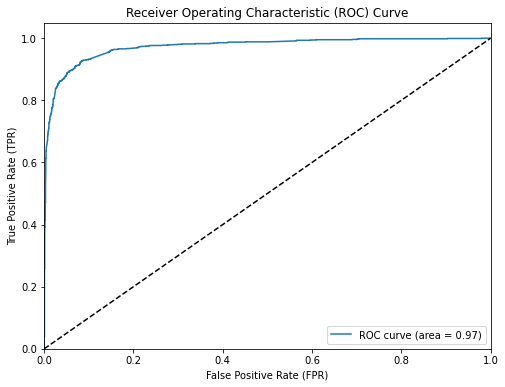

In [144]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_probs):
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    auc_score = roc_auc_score(y_true, y_probs)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc_score))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Assuming you have fitted the logistic regression model and obtained predictions
logistic_model.fit(X_train_selected, y_train)
y_probs = logistic_model.predict_proba(X_test_selected)[:, 1]

# Plot the ROC curve
plot_roc_curve(y_test, y_probs)


In [168]:
# Create a list of different probability cutoffs
cutoffs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Initialize empty lists to store the evaluation metrics for each cutoff
sensitivity_list = []
specificity_list = []
fpr_list = []
ppv_list = []
npv_list = []
accuracy_list = []

# Iterate through each cutoff
for cutoff in cutoffs:
    # Create a new column 'predicted_at_cutoff' based on the current cutoff
    results_df[f'predicted_at_{cutoff}'] = (results_df['Predicted_Probability'] >= cutoff).astype(int)
    
    # Calculate the confusion matrix for the current cutoff
    conf_matrix_at_cutoff = confusion_matrix(results_df['Actual_Churn_Flag'], results_df[f'predicted_at_{cutoff}'])
    
    # Calculate the metrics using the confusion matrix
    TN = conf_matrix_at_cutoff[0, 0]
    FP = conf_matrix_at_cutoff[0, 1]
    FN = conf_matrix_at_cutoff[1, 0]
    TP = conf_matrix_at_cutoff[1, 1]
    
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    fpr = FP / (FP + TN)
    ppv = TP / (TP + FP)
    npv = TN / (TN + FN)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    # Append the metrics to their respective lists
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)
    fpr_list.append(fpr)
    ppv_list.append(ppv)
    npv_list.append(npv)
    accuracy_list.append(accuracy)

# Create a DataFrame to store the evaluation metrics for each cutoff
cutoff_metrics_df = pd.DataFrame({
    'Cutoff': cutoffs,
    'Sensitivity': sensitivity_list,
    'Specificity': specificity_list,
    'False Positive Rate': fpr_list,
    'Positive Predictive Value': ppv_list,
    'Negative Predictive Value': npv_list,
    'Accuracy': accuracy_list
})

cutoff_metrics_df


,Cutoff,Sensitivity,Specificity,False Positive Rate,Positive Predictive Value,Negative Predictive Value,Accuracy
0,0.0,1.000000,0.000000,1.000000,0.380255,NaN,0.380255
1,0.1,0.971429,0.736280,0.263720,0.693262,0.976744,0.825697
2,0.2,0.948654,0.855945,0.144055,0.801610,0.964500,0.891198
3,0.3,0.906832,0.930894,0.069106,0.889521,0.942145,0.921745
4,0.4,0.890269,0.943598,0.056402,0.906408,0.933400,0.923319
5,0.5,0.865424,0.962907,0.037093,0.934705,0.921021,0.925838
6,0.6,0.851760,0.975356,0.024644,0.954968,0.914701,0.928358
7,0.7,0.836025,0.978150,0.021850,0.959145,0.906736,0.924106
8,0.8,0.777640,0.985518,0.014482,0.970543,0.878397,0.906471
9,0.9,0.688613,0.993140,0.006860,0.984024,0.838661,0.877342


In [169]:
results_df.head()

,Actual_Churn_Flag,Predicted_Probability,predicted,predicted_at_0.0,predicted_at_0.1,predicted_at_0.2,predicted_at_0.3,predicted_at_0.4,predicted_at_0.5,predicted_at_0.6,predicted_at_0.7,predicted_at_0.8,predicted_at_0.9
7113,1,0.994111,1,1,1,1,1,1,1,1,1,1,1
4749,0,0.039261,0,1,0,0,0,0,0,0,0,0,0
7986,0,0.039261,0,1,0,0,0,0,0,0,0,0,0
1281,1,0.996947,1,1,1,1,1,1,1,1,1,1,1
7346,1,0.996765,1,1,1,1,1,1,1,1,1,1,1


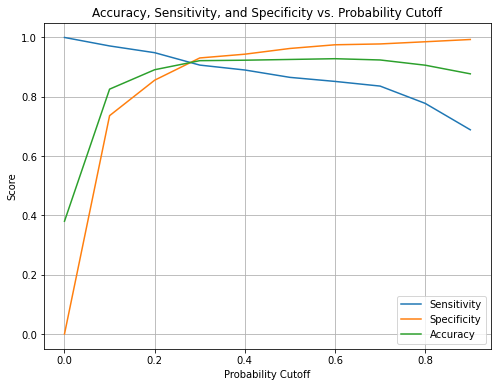

In [171]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

plt.figure(figsize=(8, 6))
plt.plot(cutoff_metrics_df['Cutoff'], cutoff_metrics_df['Sensitivity'], label='Sensitivity')
plt.plot(cutoff_metrics_df['Cutoff'], cutoff_metrics_df['Specificity'], label='Specificity')
plt.plot(cutoff_metrics_df['Cutoff'], cutoff_metrics_df['Accuracy'], label='Accuracy')
plt.xlabel('Probability Cutoff')
plt.ylabel('Score')
plt.title('Accuracy, Sensitivity, and Specificity vs. Probability Cutoff')
plt.legend()
plt.grid(True)
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [173]:
results_df['final_predicted'] = results_df.Predicted_Probability.map( lambda x: 1 if x > 0.3 else 0)

results_df.head()

,Actual_Churn_Flag,Predicted_Probability,predicted,predicted_at_0.0,predicted_at_0.1,predicted_at_0.2,predicted_at_0.3,predicted_at_0.4,predicted_at_0.5,predicted_at_0.6,predicted_at_0.7,predicted_at_0.8,predicted_at_0.9,final_predicted
7113,1,0.994111,1,1,1,1,1,1,1,1,1,1,1,1
4749,0,0.039261,0,1,0,0,0,0,0,0,0,0,0,0
7986,0,0.039261,0,1,0,0,0,0,0,0,0,0,0,0
1281,1,0.996947,1,1,1,1,1,1,1,1,1,1,1,1
7346,1,0.996765,1,1,1,1,1,1,1,1,1,1,1,1


In [174]:
# Let's check the overall accuracy.
metrics.accuracy_score(results_df.Actual_Churn_Flag,results_df.final_predicted)

0.9217446071484805

## Precision and Recall

In [176]:
# Calculate Precision
precision = TP / (TP + FP)

# Calculate Recall (Sensitivity)
recall = TP / (TP + FN)

In [177]:
precision

0.9840236686390532

In [178]:
recall

0.6886128364389233

### Making predictions on the test set

In [222]:
X_test_const = sm.add_constant(X_test_selected)

In [223]:
y_test_pred = res.predict(X_test_const)

In [224]:
y_test_pred.head()

4703    0.987342
5544    0.377657
5520    0.072540
1342    0.001074
4101    0.017074
dtype: float64

In [225]:
# Converting y_pred to a dataframe which is an array
y_prediction = pd.DataFrame(y_test_pred)

In [226]:
y_prediction.head()

,0
4703,0.987342
5544,0.377657
5520,0.072540
1342,0.001074
4101,0.017074


In [227]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [228]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [229]:
# Removing index for both dataframes to append them side by side 
y_prediction.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [230]:
# Appending y_test_df and y_prediction
y_pred_final = pd.concat([y_test_df, y_prediction],axis=1)

In [231]:
y_pred_final.head()

,Converted,LeadID,0
0,1,4703,0.987342
1,0,5544,0.377657
2,0,5520,0.072540
3,1,1342,0.001074
4,0,4101,0.017074


In [232]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
y_pred_final

,Converted,LeadID,Churn_Prob
0,1,4703,0.987342
1,0,5544,0.377657
2,0,5520,0.072540
3,1,1342,0.001074
4,0,4101,0.017074
...,...,...,...
2717,0,6336,0.047816
2718,1,4610,0.999491
2719,0,376,0.065345
2720,1,5790,0.996191


In [233]:
# Let's see  y_pred_final
y_pred_final.head()

,Converted,LeadID,Churn_Prob
0,1,4703,0.987342
1,0,5544,0.377657
2,0,5520,0.072540
3,1,1342,0.001074
4,0,4101,0.017074


In [234]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [235]:
y_pred_final.head()

,Converted,LeadID,Churn_Prob,final_predicted
0,1,4703,0.987342,1
1,0,5544,0.377657,1
2,0,5520,0.072540,0
3,1,1342,0.001074,0
4,0,4101,0.017074,0


In [239]:
# Evaluating the performance

actual_churn = y_pred_final['Converted']
predicted_churn = y_pred_final['final_predicted']


# Calculate accuracy
accuracy_1 = accuracy_score(actual_churn, predicted_churn)
print("Accuracy:", accuracy_1)

# Generate classification report
class_report_1 = classification_report(actual_churn, predicted_churn)
print("Classification Report:\n", class_report_1)

# Generate confusion matrix
conf_matrix_1 = confusion_matrix(actual_churn, predicted_churn)
print("Confusion Matrix:\n", conf_matrix_1)

Accuracy: 0.9213813372520205
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      1702
           1       0.87      0.93      0.90      1020

    accuracy                           0.92      2722
   macro avg       0.91      0.92      0.92      2722
weighted avg       0.92      0.92      0.92      2722

Confusion Matrix:
 [[1564  138]
 [  76  944]]


In [240]:
# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TN = conf_matrix_1[0, 0]
FP = conf_matrix_1[0, 1]
FN = conf_matrix_1[1, 0]
TP = conf_matrix_1[1, 1]

# Calculate Sensitivity (Recall)
sensitivity = TP / (TP + FN)

# Calculate Specificity
specificity = TN / (TN + FP)

# Calculate False Positive Rate (FPR)
fpr = FP / (FP + TN)

# Calculate Positive Predictive Value (Precision)
ppv = TP / (TP + FP)

# Calculate Negative Predictive Value (NPV)
npv = TN / (TN + FN)

# Display the results
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("False Positive Rate (FPR):", fpr)
print("Positive Predictive Value (Precision):", ppv)
print("Negative Predictive Value (NPV):", npv)

Sensitivity (Recall): 0.9254901960784314
Specificity: 0.918918918918919
False Positive Rate (FPR): 0.08108108108108109
Positive Predictive Value (Precision): 0.8724584103512015
Negative Predictive Value (NPV): 0.9536585365853658
